In [1]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import math
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score


In [15]:
from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_csv('t_minus_7_hrs_data.csv')


In [4]:
df_repurchased = data


In [5]:
## Dropping observations with NAs 
df_repurchased = df_repurchased.dropna()

In [6]:
#df_repurchased.to_csv('testdata_model.csv',index=False)

In [7]:
## Checking for data imbalance
df_repurchased['repurchased'].value_counts(normalize = True)*100

False    99.772562
True      0.227438
Name: repurchased, dtype: float64

In [8]:
df_repurchased.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141577 entries, 0 to 141576
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   141577 non-null  int64  
 1   MDM ID                       141577 non-null  object 
 2   Serial Number                141577 non-null  object 
 3   Printer Total                141577 non-null  int64  
 4   HW Revenue                   141577 non-null  float64
 5   Registration_Dt              141577 non-null  object 
 6   First Purchase Date          141577 non-null  object 
 7   Last Purchase Date           141577 non-null  object 
 8   Product ID                   141577 non-null  object 
 9   Product Category NM          141577 non-null  object 
 10  Part DN                      141577 non-null  object 
 11  Product NM                   141577 non-null  object 
 12  Product Price                141577 non-null  float64
 13 

In [9]:
## Dropping columns that have high correlation with repurchase
df_repurchased = df_repurchased.drop(columns = ['Printer Total','First Purchase Date','Last Purchase Date','within_last_year'])

In [10]:
df_repurchased.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055283 entries, 0 to 2055282
Data columns (total 33 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   MDM ID                       object 
 1   Serial Number                object 
 2   HW Revenue                   float64
 3   Registration_Dt              object 
 4   Product ID                   object 
 5   Product Category NM          object 
 6   Part DN                      object 
 7   Product NM                   object 
 8   Product Price                object 
 9   Age                          object 
 10  Household Income             object 
 11  Gender                       object 
 12  Occupation                   object 
 13  Zip Code                     object 
 14  Household Size               object 
 15  Education                    object 
 16  lifetime_loyalty_class       object 
 17  supply_selectability_number  object 
 18  user_sub_environment         object 
 19  

In [10]:
# Create a label encoder object
le = LabelEncoder()
cat_cols = df_repurchased.select_dtypes(include=['object']).columns
# Apply the label encoder to each column
for col in cat_cols:
    
    df_repurchased[col] = le.fit_transform(df_repurchased[col])   

In [11]:
pd.set_option('display.max_columns',None)

In [12]:
df_repurchased.corr()

,Unnamed: 0,MDM ID,Serial Number,HW Revenue,Registration_Dt,Product ID,Product Category NM,Part DN,Product NM,Product Price,Age,Household Income,Gender,Occupation,Zip Code,Household Size,Reading General,Crafts,Computers,Sports,Exercise Health,Movie Music,Education,lifetime_loyalty_class,supply_selectability_number,user_sub_environment,ampv,ave_cc_mo,blk_cc_mo,color_cc_mo,hp_share,days,trade_cc,hp_cc,first_report,last_report,subscription_state,current_plan,repurchased
Unnamed: 0,1.000000,0.999998,-0.003881,-0.008064,0.000321,-0.001112,-0.001081,-0.001112,-0.000656,-0.003183,-0.001399,0.000536,0.002803,-0.004397,0.005023,-0.001725,-0.002884,-0.005280,0.000701,-0.001111,-0.000637,-0.001383,-0.003480,0.000360,-0.000939,-0.001297,-0.001221,-0.000213,0.000188,-0.000535,0.002551,-0.000272,-0.000774,-0.000684,0.001629,0.003523,0.003609,0.005017,0.000766
MDM ID,0.999998,1.000000,-0.003879,-0.008076,0.000326,-0.001114,-0.001080,-0.001114,-0.000653,-0.003184,-0.001398,0.000535,0.002806,-0.004396,0.005017,-0.001725,-0.002888,-0.005271,0.000702,-0.001104,-0.000637,-0.001372,-0.003486,0.000371,-0.000940,-0.001299,-0.001227,-0.000224,0.000181,-0.000546,0.002553,-0.000264,-0.000767,-0.000676,0.001621,0.003517,0.003613,0.005018,0.000776
Serial Number,-0.003881,-0.003879,1.000000,0.003553,-0.005758,0.000551,0.000485,0.000551,0.005354,0.002540,0.000825,-0.003091,-0.000730,0.001743,-0.001888,0.004508,0.003665,0.001506,-0.001711,0.002670,0.001175,0.004464,-0.001805,-0.003988,0.002070,0.001191,-0.000639,0.000955,0.001287,0.000395,-0.001014,0.001843,0.001860,0.002401,-0.002086,-0.001369,-0.000733,0.001560,-0.002840
HW Revenue,-0.008064,-0.008076,0.003553,1.000000,0.033848,-0.236213,0.052163,-0.236213,0.450177,0.753079,0.022457,0.099854,0.040502,0.007178,-0.001737,0.004961,-0.003488,-0.004561,0.008265,0.003522,-0.001048,-0.018632,0.052723,0.038462,0.453677,0.068931,0.069234,0.057216,0.051947,0.047306,0.014440,-0.080009,0.143224,0.142188,0.063677,-0.025897,-0.117575,-0.082355,0.065600
Registration_Dt,0.000321,0.000326,-0.005758,0.033848,1.000000,-0.088714,-0.034001,-0.088714,-0.074664,0.015875,0.014232,-0.034031,-0.056802,0.012369,0.002229,-0.102508,0.031222,0.028920,0.027530,0.024833,0.028115,0.063553,0.021767,0.023547,-0.069242,0.018775,0.003674,0.008518,0.004486,0.010088,0.097769,0.001676,-0.005605,0.002796,-0.033234,-0.083499,-0.167361,-0.158387,0.100918
Product ID,-0.001112,-0.001114,0.000551,-0.236213,-0.088714,1.000000,0.022216,1.000000,-0.318034,-0.275486,0.024040,-0.050179,-0.005061,-0.007020,-0.001728,0.013958,-0.006669,0.009336,-0.010452,-0.009477,-0.006913,-0.003021,-0.026556,0.008158,-0.488039,0.032676,-0.020480,-0.021122,-0.013503,-0.022786,-0.085826,0.226287,0.070468,0.066048,-0.255632,-0.143104,0.060059,0.088664,-0.003113
Product Category NM,-0.001081,-0.001080,0.000485,0.052163,-0.034001,0.022216,1.000000,0.022216,0.013473,0.071122,-0.009730,-0.000874,0.002641,0.001257,-0.003556,0.003110,0.000220,0.002990,-0.003328,0.000640,-0.002261,-0.001606,-0.000627,-0.000322,0.040011,0.000406,0.000665,0.001250,0.000616,0.001519,-0.024725,-0.012107,-0.011536,-0.013213,0.007375,-0.013335,0.034777,0.035657,-0.003075
Part DN,-0.001112,-0.001114,0.000551,-0.236213,-0.088714,1.000000,0.022216,1.000000,-0.318034,-0.275486,0.024040,-0.050179,-0.005061,-0.007020,-0.001728,0.013958,-0.006669,0.009336,-0.010452,-0.009477,-0.006913,-0.003021,-0.026556,0.008158,-0.488039,0.032676,-0.020480,-0.021122,-0.013503,-0.022786,-0.085826,0.226287,0.070468,0.066048,-0.255632,-0.143104,0.060059,0.088664,-0.003113
Product NM,-0.000656,-0.000653,0.005354,0.450177,-0.074664,-0.318034,0.013473,-0.318034,1.000000,0.566332,0.031161,0.148748,0.066041,0.000143,0.010305,0.027842,0.000942,-0.017405,0.008051,0.001089,-0.006094,-0.029444,0.066698,0.062347,0.618357,0.048220,0.047708,0.044977,0.037946,0.039898,-0.043350,0.018730,0.208378,0.201612,-0.019275,-0.007229,-0.151492,-0.131570,0.006634
Product Price,-0.003183,-0.003184,0.002540,0.753079,0.015875,-0.275486,0.071122,-0.275486,

In [13]:
df_repurchased.shape

(141577, 39)

In [22]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(df_repurchased.drop(columns =['repurchased','Serial Number'],axis = 1),df_repurchased['repurchased'] ,test_size=0.4, random_state=42,stratify =df_repurchased['repurchased'] )


## Using smote sampling technique to tackle the data imbalance
smote = SMOTE()

# Fit SMOTE to training data and apply transformation
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train_smote, y_train_smote)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9974042485564444


In [23]:
y_train_smote.value_counts()

False    84753
True     84753
Name: repurchased, dtype: int64

In [24]:
def confusion_matrix_(test, predictions):
    cm = confusion_matrix(test, predictions)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
report_rf = classification_report(y_test, y_pred)
print(report_rf)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     56502
        True       0.30      0.11      0.16       129

    accuracy                           1.00     56631
   macro avg       0.65      0.55      0.58     56631
weighted avg       1.00      1.00      1.00     56631



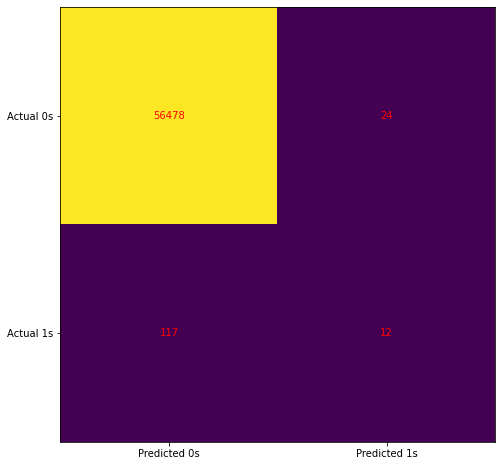

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix_(y_test,y_pred)

# XGBoost Model

In [26]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [27]:
y_pred_xgb = xgb_classifier.predict(X_test)

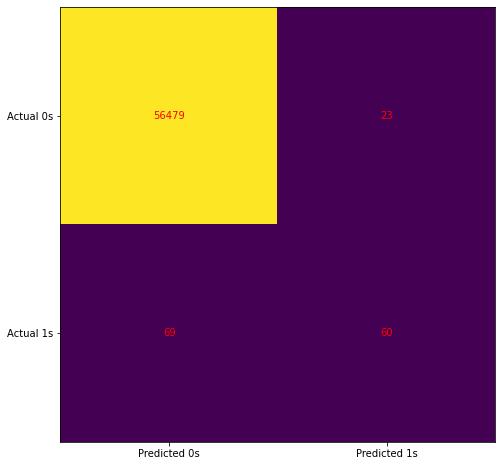

In [28]:
confusion_matrix_(y_test,y_pred_xgb)

In [29]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     56502
        True       0.72      0.47      0.57       129

    accuracy                           1.00     56631
   macro avg       0.86      0.73      0.78     56631
weighted avg       1.00      1.00      1.00     56631



In [30]:
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

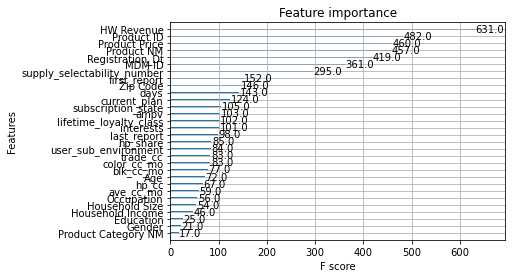

In [32]:
import shap
xgb.plot_importance(xgb_classifier)

In [33]:
'''import pickle
xgbc_path = "xgbc_model.pkl"

pickle.dump(xgb_classifier, open(xgbc_path, 'wb'))'''

In [34]:
'''param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5]
}'''

In [36]:
'''from sklearn.model_selection import GridSearchCV

xgbc_tune_model = xgb.XGBClassifier(objective="binary:logistic",tree_method='gpu_hist', gpu_id=0,random_state = 25, max_delta_step=1)'''

In [ ]:
'''grid_cv = GridSearchCV(xgbc_tune_model, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")'''